# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

### Признаки

• RowNumber — индекс строки в данных  
• CustomerId — уникальный идентификатор клиента  
• Surname — фамилия  
• CreditScore — кредитный рейтинг  
• Geography — страна проживания
• Gender — пол  
• Age — возраст  
• Tenure — количество недвижимости у клиента  
• Balance — баланс на счёте  
• NumOfProducts — количество продуктов банка, используемых клиентом  
• HasCrCard — наличие кредитной карты  
• IsActiveMember — активность клиента  
• EstimatedSalary — предполагаемая зарплата

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим пропуски в колонке "Tenure"(сколько лет человек является клиентом банка). Поскольку единица измерения колонки это годы, то возможно это клиенты, которые работают с этим банком менее 1 года. Вероятно их можно заполнить единицами, но я бы все равно заполнил медианой, т.к. если мое предположение неверно, то медианные значения меньше повлияют на результат

In [4]:
df.columns = df.columns.str.lower()
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
t = df.dtypes
t

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

Для удобства перевел названия колонок в нижний регистр

In [6]:
df.isnull().sum()

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [7]:
df['tenure'] = df['tenure'].fillna(df['tenure'].median())

df.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

Заполнил пропуски медианой, проверил

In [8]:
df = df.astype(str).apply(lambda x: x.str.lower())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null object
customerid         10000 non-null object
surname            10000 non-null object
creditscore        10000 non-null object
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null object
tenure             10000 non-null object
balance            10000 non-null object
numofproducts      10000 non-null object
hascrcard          10000 non-null object
isactivemember     10000 non-null object
estimatedsalary    10000 non-null object
exited             10000 non-null object
dtypes: object(14)
memory usage: 1.1+ MB


In [9]:
df = df.astype(t)

df.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

Перевел все данные в таблице в нижний регистр, чтобы ничего не выпало при анализе и подготовке к обучению. Тип данных везде изменился на object, верну старые типы данных

In [10]:
df_crop = df.drop(['rownumber', 'customerid', 'surname'], axis=1)
df_crop.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

In [11]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [12]:
df_ohe = pd.get_dummies(df_crop, drop_first=True)
df_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
creditscore          10000 non-null int64
age                  10000 non-null int64
tenure               10000 non-null float64
balance              10000 non-null float64
numofproducts        10000 non-null int64
hascrcard            10000 non-null int64
isactivemember       10000 non-null int64
estimatedsalary      10000 non-null float64
exited               10000 non-null int64
geography_germany    10000 non-null uint8
geography_spain      10000 non-null uint8
gender_male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [14]:
target = df_ohe['exited']
features = df_ohe.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

df.info()


print()
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


Применил OHE к таблице, разделил выборку: Обучающая 60%, Валидационная 20%, Тестовая 20%

In [15]:
scaler = StandardScaler()

numeric = ['creditscore', 'age', 'numofproducts', 'hascrcard',
           'isactivemember', 'estimatedsalary', 'balance', 'tenure']

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

features_train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_germany,geography_spain,gender_male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,0.642466,-1.055187,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,-1.556504,0.947699,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,0.642466,-1.055187,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,-1.556504,-1.055187,1.524268,1,0,0


## Исследование задачи

In [16]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0

for est in range(10, 81, 5):
    for depth in range(1, 21, 1):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        
        if result > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result
            
print("F1 наилучшей модели на валидационной выборке:", best_result, ', Лучший est:', best_est, ', Глубина:', best_depth)
print('Accuracy:', accuracy_score(target_valid, predicted))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

F1 наилучшей модели на валидационной выборке: 0.5941176470588235 , Лучший est: 15 , Глубина: 14
Accuracy: 0.859


Качество модели оставляет желать лучшего, предполагаю, что дело в дисбалансе классов целевого признака. Не стал пробовать на остальных моделях, потому что ожидаемо там будет также плохой результат, лучше сразу проверю свое предположение

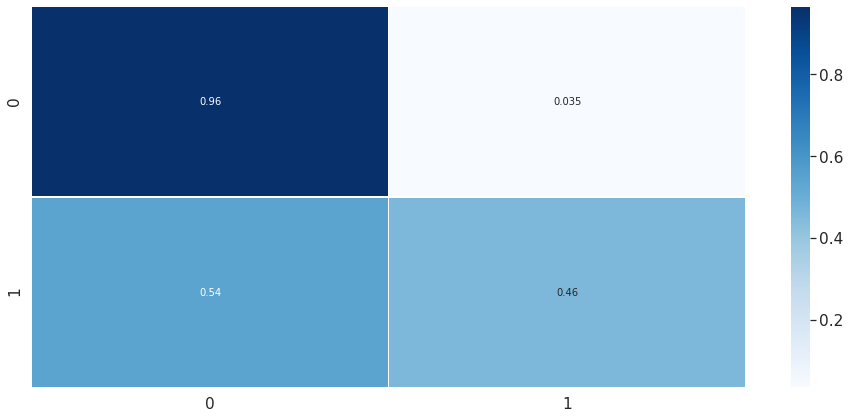

In [17]:
matrix = confusion_matrix(target_valid, predicted)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

plt.figure(figsize=(16, 7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Blues, linewidths=0.2)

По матрице видим, что модель не справляется с прогнозом позитивных ответов

In [18]:
#Полнота - доля TP-ответов среди всех, у которых истинная метка 1 tp/tp+fn

recall_score(target_valid, predicted)

0.45933014354066987

In [19]:
#Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные.
#Чем больше отрицательных, тем ниже точность.

precision_score(target_valid, predicted)

0.7741935483870968

In [20]:
#Среднее гармоническое полноты и точности.

f1_score(target_valid, predicted)

0.5765765765765767


AxesSubplot(0.125,0.125;0.775x0.755)


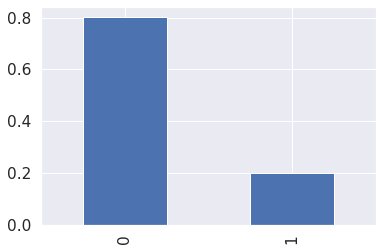

In [21]:
class_balance = target_train.value_counts(normalize=True).plot.bar()

print()
print(class_balance)

По метрикам видно, что модель отлично предсказывает нулевые значения (True Negative), но ужасно справляется с единицами (True positive). Причины этого могут быть совершенно разные, но я бы в первую очередь обратил внимание на дисбаланс классов, его мы видим на последней гистограме.

## Борьба с дисбалансом

# Случайный лес

class_weight

In [22]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0

for est in range(10, 81, 5):
    for depth in range(1, 21, 1):
        
        model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        
        if result > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result
            
print("F1 наилучшей модели на валидационной выборке:", best_result, ', est:', best_est, ', depth:', best_depth)
print('Accuracy:', accuracy_score(target_valid, predicted))

F1 наилучшей модели на валидационной выборке: 0.6337543053960963 , est: 80 , depth: 9
Accuracy: 0.8595


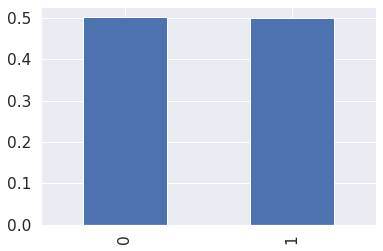

In [23]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]

target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

class_balance_upsample = target_upsampled.value_counts(normalize=True).plot.bar()

Сбалансировал данные методом unsampling

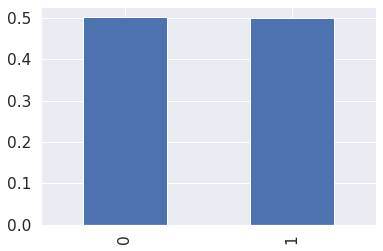

In [24]:
features_downsampled = pd.concat(
    [features_zeros.sample(frac=0.25, random_state=12345)] + [features_ones])
    
target_downsampled = pd.concat(
    [target_zeros.sample(frac=0.25, random_state=12345)] + [target_ones])
    
features_downsampled, target_downsampled = shuffle(
    features_downsampled, target_downsampled, random_state=12345)

class_balance_downsampled = target_downsampled.value_counts(normalize=True).plot.bar()

Сбалансировал данные методом downsampling

upsampling

In [25]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0

for est in range(10, 81, 5):
    for depth in range(1, 21, 1):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        
        if result > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result
            
print("F1 наилучшей модели на валидационной выборке:", best_result, ', est:', best_est, ', depth:', best_depth)
print('Accuracy:', accuracy_score(target_valid, predicted))

F1 наилучшей модели на валидационной выборке: 0.6291179596174282 , est: 70 , depth: 9
Accuracy: 0.847


downsampling

In [26]:
best_model = None
best_depth = 0
best_est = 0
best_result = 0

for est in range(10, 81, 5):
    for depth in range(1, 21, 1):
        
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predicted = model.predict(features_valid)
        result = f1_score(target_valid, predicted)
        
        if result > best_result:
            best_model = model
            best_depth = depth
            best_est = est
            best_result = result
            
print("F1 наилучшей модели на валидационной выборке:", best_result, ', est:', best_est, ', depth:', best_depth)
print('Accuracy:', accuracy_score(target_valid, predicted))

F1 наилучшей модели на валидационной выборке: 0.6092184368737475 , est: 10 , depth: 4
Accuracy: 0.7685


Случайный лес обычно показывает лучшее качество прогнозов, поэтому протестировал методы именно на этой модели в первую очередь. С учетом дисбаланса модель стала работать лучше. Лучший результат у случайного леса получился с применением метода class_weight

# Дерево решений

class_weight

In [27]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth in range(1, 31, 1):
    
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_tree.fit(features_train, target_train)
    predicted_tree = model_tree.predict(features_valid)
    result_tree = f1_score(target_valid, predicted_tree)
    
    if result_tree > best_result_tree:
        best_result_tree = result_tree
        best_model_tree = model_tree
        best_depth_tree = depth
        
print('F1 наилучшей модели на валидационной выборке:', best_result_tree, ', Лучший depth:', best_depth_tree)
print('Accuracy:', accuracy_score(target_valid, predicted_tree))
        

F1 наилучшей модели на валидационной выборке: 0.5963791267305644 , Лучший depth: 5
Accuracy: 0.7885


upsampling

In [28]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth in range(1, 31, 1):
    
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predicted_tree = model_tree.predict(features_valid)
    result_tree = f1_score(target_valid, predicted_tree)
    
    if result_tree > best_result_tree:
        best_result_tree = result_tree
        best_model_tree = model_tree
        best_depth_tree = depth
        
print('F1 наилучшей модели на валидационной выборке:', best_result_tree, ', Лучший depth:', best_depth_tree)
print('Accuracy:', accuracy_score(target_valid, predicted_tree))
        

F1 наилучшей модели на валидационной выборке: 0.5963791267305644 , Лучший depth: 5
Accuracy: 0.789


downsampling

In [29]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

for depth in range(1, 31, 1):
    
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_downsampled, target_downsampled)
    predicted_tree = model_tree.predict(features_valid)
    result_tree = f1_score(target_valid, predicted_tree)
    
    if result_tree > best_result_tree:
        best_result_tree = result_tree
        best_model_tree = model_tree
        best_depth_tree = depth
        
print('F1 наилучшей модели на валидационной выборке:', best_result_tree, ', Лучший depth:', best_depth_tree)
print('Accuracy:', accuracy_score(target_valid, predicted_tree))
        

F1 наилучшей модели на валидационной выборке: 0.5943204868154158 , Лучший depth: 5
Accuracy: 0.6935


Лучший результат у дерева решений получился с применением метода downsampling

In [30]:
model_test = DecisionTreeClassifier(random_state=12345, max_depth=5)

model_test.fit(features_downsampled, target_downsampled)

probabilities_valid = model_test.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))

predicted_test = model_test.predict(features_valid)
f1 = f1_score(target_valid, predicted_test)
accuracy = accuracy_score(target_valid, predicted_test)

print()
print('F1:', f1)
print('Accuracy:', accuracy)

Порог = 0.00 | Точность = 0.208, Полнота = 0.993
Порог = 0.02 | Точность = 0.208, Полнота = 0.993
Порог = 0.04 | Точность = 0.210, Полнота = 0.986
Порог = 0.06 | Точность = 0.253, Полнота = 0.957
Порог = 0.08 | Точность = 0.253, Полнота = 0.957
Порог = 0.10 | Точность = 0.253, Полнота = 0.957
Порог = 0.12 | Точность = 0.253, Полнота = 0.957
Порог = 0.14 | Точность = 0.253, Полнота = 0.957
Порог = 0.16 | Точность = 0.254, Полнота = 0.957
Порог = 0.18 | Точность = 0.256, Полнота = 0.955
Порог = 0.20 | Точность = 0.256, Полнота = 0.955
Порог = 0.22 | Точность = 0.256, Полнота = 0.955
Порог = 0.24 | Точность = 0.293, Полнота = 0.911
Порог = 0.26 | Точность = 0.293, Полнота = 0.911
Порог = 0.28 | Точность = 0.370, Полнота = 0.828
Порог = 0.30 | Точность = 0.370, Полнота = 0.828
Порог = 0.32 | Точность = 0.370, Полнота = 0.828
Порог = 0.34 | Точность = 0.373, Полнота = 0.828
Порог = 0.36 | Точность = 0.373, Полнота = 0.828
Порог = 0.38 | Точность = 0.393, Полнота = 0.789
Порог = 0.40 | Точно

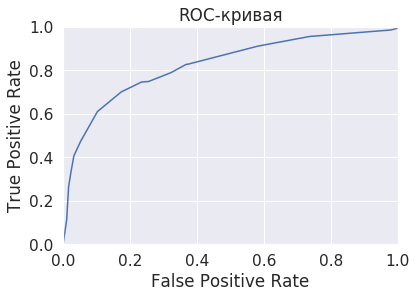


F1: 0.5943204868154158
Accuracy: 0.8
AUC-ROC: 0.8241029464247908


In [31]:
model_test = DecisionTreeClassifier(random_state=12345, max_depth=5)

model_test.fit(features_downsampled, target_downsampled)

probabilities_valid = model_test.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

predicted_test = model_test.predict(features_valid)
f1 = f1_score(target_valid, predicted_test)
accuracy = accuracy_score(target_valid, predicted_test)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print()
print('F1:', f1)
print('Accuracy:', accuracy)
print('AUC-ROC:', auc_roc)

# Логистическая регрессия

class_weight

In [32]:
model_log = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_log.fit(features_train, target_train)
predicted_log = model_log.predict(features_valid)
result_log = f1_score(target_valid, predicted_log)
    
print('f1 наилучшей модели на валидационной выборке:', result_log)
print('Accuracy:', accuracy_score(target_valid, predicted_log))


f1 наилучшей модели на валидационной выборке: 0.4888507718696398
Accuracy: 0.702


upsampling

In [33]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(features_upsampled, target_upsampled)
predicted_log = model_log.predict(features_valid)
result_log = f1_score(target_valid, predicted_log)

print('F1 наилучшей модели на валидационной выборке:', result_log)
print('Accuracy:', accuracy_score(target_valid, predicted_log))


F1 наилучшей модели на валидационной выборке: 0.4888507718696398
Accuracy: 0.702


downsampling

In [34]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(features_downsampled, target_downsampled)
predicted_log = model_log.predict(features_valid)
result_log = f1_score(target_valid, predicted_log)
        
print('F1 наилучшей модели на валидационной выборке:', result_log)
print('Accuracy:', accuracy_score(target_valid, predicted_log))


F1 наилучшей модели на валидационной выборке: 0.48406546080964685
Accuracy: 0.7005


In [35]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(features_downsampled, target_downsampled)

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    
    predicted_log = model_log.predict(features_valid)
    f1 = f1_score(target_valid, predicted_log)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))


#predicted_log = model_log.predict(features_valid)
result_log = f1_score(target_valid, predicted_log)
print()
print('F1 наилучшей модели на валидационной выборке:', result_log)
print('Accuracy:', accuracy_score(target_valid, predicted_log))


Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.02 | Точность = 0.209, Полнота = 1.000
Порог = 0.04 | Точность = 0.209, Полнота = 1.000
Порог = 0.06 | Точность = 0.210, Полнота = 1.000
Порог = 0.08 | Точность = 0.212, Полнота = 1.000
Порог = 0.10 | Точность = 0.216, Полнота = 1.000
Порог = 0.12 | Точность = 0.220, Полнота = 0.995
Порог = 0.14 | Точность = 0.225, Полнота = 0.990
Порог = 0.16 | Точность = 0.230, Полнота = 0.986
Порог = 0.18 | Точность = 0.236, Полнота = 0.981
Порог = 0.20 | Точность = 0.242, Полнота = 0.964
Порог = 0.22 | Точность = 0.250, Полнота = 0.952
Порог = 0.24 | Точность = 0.257, Полнота = 0.943
Порог = 0.26 | Точность = 0.265, Полнота = 0.931
Порог = 0.28 | Точность = 0.271, Полнота = 0.919

F1 наилучшей модели на валидационной выборке: 0.48406546080964685
Accuracy: 0.7005


In [36]:
model_log = LogisticRegression(random_state=12345, solver='liblinear')
model_log.fit(features_downsampled, target_downsampled)

probabilities_valid = model_log.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    
    predicted_log = model_log.predict(features_valid)
    f1 = f1_score(target_valid, predicted_log)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))


#predicted_log = model_log.predict(features_valid)
result_log = f1_score(target_valid, predicted_log)
print()
print('F1 наилучшей модели на валидационной выборке:', result_log)
print('Accuracy:', accuracy_score(target_valid, predicted_log))


Порог = 0.00 | Точность = 0.209, Полнота = 1.000
Порог = 0.02 | Точность = 0.209, Полнота = 1.000
Порог = 0.04 | Точность = 0.209, Полнота = 1.000
Порог = 0.06 | Точность = 0.210, Полнота = 1.000
Порог = 0.08 | Точность = 0.212, Полнота = 1.000
Порог = 0.10 | Точность = 0.216, Полнота = 1.000
Порог = 0.12 | Точность = 0.220, Полнота = 0.995
Порог = 0.14 | Точность = 0.225, Полнота = 0.990
Порог = 0.16 | Точность = 0.230, Полнота = 0.986
Порог = 0.18 | Точность = 0.236, Полнота = 0.981
Порог = 0.20 | Точность = 0.242, Полнота = 0.964
Порог = 0.22 | Точность = 0.250, Полнота = 0.952
Порог = 0.24 | Точность = 0.257, Полнота = 0.943
Порог = 0.26 | Точность = 0.265, Полнота = 0.931
Порог = 0.28 | Точность = 0.271, Полнота = 0.919

F1 наилучшей модели на валидационной выборке: 0.48406546080964685
Accuracy: 0.7005


Логистическая регрессия в принципе показала себя хуже других моделей вне зависимости от метода борьбы с дисбалансом

## Тестирование модели

Для тестирования я выбрал модель случайного леса, потому что она показала самые лучшие результаты среди моделей

class_weight

In [40]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=80, max_depth=9)
model.fit(features_train, target_train)
predicted = model.predict(features_test)
result = f1_score(target_test, predicted)

print("F1 наилучшей модели на валидационной выборке:", result)
print('Accuracy:', accuracy_score(target_test, predicted))

F1 наилучшей модели на валидационной выборке: 0.6124293785310734
Accuracy: 0.8285


В ходе проекта были обнаружены пропуски в колонке Tenure, которые я заполнил медианой. Обнаружен дисбаланс классов с которым я справился при помощи метода class_weight (на тестовой выборке он оказался самым эффективным). При исследовании разных моделей было выявлено, что лучше всех себя показала в нашей задаче модель случайного дерева. Достигнуто необходимое значение F1 > 0.59.